# Introduction to AI - Final Project 

Autumn 2023 - Turku University of Applied Sciences

## Part A. Machine Learning Project (Classification)

**Dataset: Processed COVID-19 Data**

**Project Overview:**

In this project, you should use the COVID-19 data collect by Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports) for a simple classification task.



### Instructions and tasks:

**1.	Load Data**:

Load all the CSV files regarding the Agust 2020, containing COVID-19 data from the provided address and combine them into a unified dataset.

08-01-2020.csv

08-02-2020.csv

08-03-2020.csv

...

08-28-2020.csv

08-29-2020.csv

08-30-2020.csv

08-31-2020.csv

**Hint:** If you want to concatenate the files vertically (stack them on top of each other), you can use the 'concat' function in Python and Pandas.
If you don't want to use Python here and prefer a graphical tool, you can use software like Microsoft Excel or Google Sheets to import the CSV files into worksheets and then copy/paste or import the data as needed. 


In [2]:
# load the data and merge them
import os
import pandas as pd

folder_path = r"C:\Users\Miro-\Downloads\csse_covid_19_daily_reports"


file_list = os.listdir(folder_path)

august_files = [file for file in file_list if file.startswith("08") and file.endswith(".csv")]


combined_data = pd.DataFrame()

for file in august_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

combined_data.head()



,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-08-02 04:34:47,34.223334,-82.461707,288,7,0.0,281.0,"Abbeville, South Carolina, US",1174.216170,2.430556,NaN,NaN
1,22001.0,Acadia,Louisiana,US,2020-08-02 04:34:47,30.295065,-92.414197,2331,71,0.0,2260.0,"Acadia, Louisiana, US",3756.950600,3.045903,NaN,NaN
2,51001.0,Accomack,Virginia,US,2020-08-02 04:34:47,37.767072,-75.632346,1077,15,0.0,1062.0,"Accomack, Virginia, US",3332.714445,1.392758,NaN,NaN
3,16001.0,Ada,Idaho,US,2020-08-02 04:34:47,43.452658,-116.241552,8004,62,0.0,7942.0,"Ada, Idaho, US",1662.004996,0.774613,NaN,NaN
4,19001.0,Adair,Iowa,US,2020-08-02 04:34:47,41.330756,-94.471059,20,0,0.0,20.0,"Adair, Iowa, US",279.642058,0.000000,NaN,NaN


**2. Drop the Case-Fatality_Ration column from the dataset**

Note: we remove this column to calculate it based on two other features in the next step. This action is solely undertaken for the purpose of practicing feature engineering in this project.

In [4]:
# Drop the Case-Fatality_Ration column from the dataset

file_list = os.listdir(folder_path)

august_files = [file for file in file_list if file.startswith("08") and file.endswith(".csv")]

combined_data = pd.DataFrame()

for file in august_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

combined_data = combined_data.drop("Case-Fatality_Ratio", axis=1, errors="ignore")

combined_data.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Incident_Rate,Case_Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-08-02 04:34:47,34.223334,-82.461707,288,7,0.0,281.0,"Abbeville, South Carolina, US",1174.216170,NaN,NaN
1,22001.0,Acadia,Louisiana,US,2020-08-02 04:34:47,30.295065,-92.414197,2331,71,0.0,2260.0,"Acadia, Louisiana, US",3756.950600,NaN,NaN
2,51001.0,Accomack,Virginia,US,2020-08-02 04:34:47,37.767072,-75.632346,1077,15,0.0,1062.0,"Accomack, Virginia, US",3332.714445,NaN,NaN
3,16001.0,Ada,Idaho,US,2020-08-02 04:34:47,43.452658,-116.241552,8004,62,0.0,7942.0,"Ada, Idaho, US",1662.004996,NaN,NaN
4,19001.0,Adair,Iowa,US,2020-08-02 04:34:47,41.330756,-94.471059,20,0,0.0,20.0,"Adair, Iowa, US",279.642058,NaN,NaN


**3. Feature Engineering:**

Create a new feature 'CFR' (Case Fatality Rate) using the formula: (Deaths / Confirmed) * 100.


In [5]:
# feature engineering

file_list = os.listdir(folder_path)

august_files = [file for file in file_list if file.startswith("08") and file.endswith(".csv")]

combined_data = pd.DataFrame()

for file in august_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

combined_data['CFR'] = (combined_data['Deaths'] / combined_data['Confirmed']) * 100

combined_data.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio,CFR
0,45001.0,Abbeville,South Carolina,US,2020-08-02 04:34:47,34.223334,-82.461707,288,7,0.0,281.0,"Abbeville, South Carolina, US",1174.216170,2.430556,NaN,NaN,2.430556
1,22001.0,Acadia,Louisiana,US,2020-08-02 04:34:47,30.295065,-92.414197,2331,71,0.0,2260.0,"Acadia, Louisiana, US",3756.950600,3.045903,NaN,NaN,3.045903
2,51001.0,Accomack,Virginia,US,2020-08-02 04:34:47,37.767072,-75.632346,1077,15,0.0,1062.0,"Accomack, Virginia, US",3332.714445,1.392758,NaN,NaN,1.392758
3,16001.0,Ada,Idaho,US,2020-08-02 04:34:47,43.452658,-116.241552,8004,62,0.0,7942.0,"Ada, Idaho, US",1662.004996,0.774613,NaN,NaN,0.774613
4,19001.0,Adair,Iowa,US,2020-08-02 04:34:47,41.330756,-94.471059,20,0,0.0,20.0,"Adair, Iowa, US",279.642058,0.000000,NaN,NaN,0.000000


#### **4.	Data Exploration:**

Display basic statistics and information about the dataset.

Display summary statistics for the numerical columns.

In [7]:
# data exploration

print("Dataset Information:")
combined_data.info()

print("\nSummary Statistics:")
print(combined_data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372348 entries, 0 to 372347
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FIPS                 303363 non-null  float64
 1   Admin2               303797 non-null  object 
 2   Province_State       355794 non-null  object 
 3   Country_Region       372348 non-null  object 
 4   Last_Update          372348 non-null  object 
 5   Lat                  364174 non-null  float64
 6   Long_                364174 non-null  float64
 7   Confirmed            372348 non-null  int64  
 8   Deaths               372348 non-null  int64  
 9   Recovered            127246 non-null  float64
 10  Active               127246 non-null  float64
 11  Combined_Key         372348 non-null  object 
 12  Incidence_Rate       120855 non-null  float64
 13  Case-Fatality_Ratio  121476 non-null  float64
 14  Incident_Rate        243226 non-null  float64
 

**5.	Define Target Variable:**

Define a binary target variable (e.g., "High CFR" or "Low CFR") based on a threshold (min value of the column) of CFR.


In [8]:
# define target variable and threshold

cfr_threshold = combined_data['CFR'].min()

combined_data['CFR_Category'] = ['High CFR' if cfr >= cfr_threshold else 'Low CFR' for cfr in combined_data['CFR']]

combined_data[['CFR', 'CFR_Category']].head()


,CFR,CFR_Category
0,2.430556,High CFR
1,3.045903,High CFR
2,1.392758,High CFR
3,0.774613,High CFR
4,0.000000,High CFR


**6.	Split Data:**

Split the data into training and test sets.


In [9]:
# split data

from sklearn.model_selection import train_test_split

X = combined_data.drop(['CFR', 'CFR_Category'], axis=1) 
y = combined_data['CFR_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (297878, 16) (297878,)
Test set shape: (74470, 16) (74470,)


**7.	Handle Missing Data:**

Implement strategies to handle any remaining missing data.


In [26]:
# handel missing values

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


file_list = os.listdir(folder_path)

august_files = [file for file in file_list if file.startswith("08") and file.endswith(".csv")]

combined_data = pd.DataFrame()

for file in august_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

numeric_cols = combined_data.select_dtypes(include=['number']).columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='mean')
combined_data[numeric_cols] = numeric_imputer.fit_transform(combined_data[numeric_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])

print("Dataset Information after Imputation:")
combined_data.info()

combined_data = combined_data.dropna()

print("\nDataset Information after Dropping Missing Values:")
combined_data.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Dataset Information after Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372348 entries, 0 to 372347
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FIPS                 372348 non-null  float64
 1   Admin2               372348 non-null  object 
 2   Province_State       372348 non-null  object 
 3   Country_Region       372348 non-null  object 
 4   Last_Update          372348 non-null  object 
 5   Lat                  372348 non-null  float64
 6   Long_                372348 non-null  float64
 7   Confirmed            372348 non-null  float64
 8   Deaths               372348 non-null  float64
 9   Recovered            372348 non-null  float64
 10  Active               372348 non-null  float64
 11  Combined_Key         372348 non-null  object 
 12  Incidence_Rate       372348 non-null  float64
 13  Case-Fatality_Ratio  372348 non-null  float64
 14  Incident_Rate        372348 no

**8.	Convert Categorical Variables (if applicable):**

If there are categorical variables (e.g., country), encode them using techniques like one-hot encoding.


In [ ]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)



**9. Train a Classification Model:**

Choose a classification algorithm (e.g., Logistic Regression, Decision Tree, Random Forest).

Train the model to predict the "High CFR" or "Low CFR" label based on the selected features.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



combined_data = pd.DataFrame()

for file in august_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

numeric_cols = combined_data.select_dtypes(include=['number']).columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='mean')
combined_data[numeric_cols] = numeric_imputer.fit_transform(combined_data[numeric_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])


if 'CFR' in combined_data.columns and 'CFR_Category' in combined_data.columns:
    X = combined_data.drop(['CFR', 'CFR_Category'], axis=1)  
    y = combined_data['CFR_Category']
else:
    print("Columns 'CFR' and/or 'CFR_Category' not found in the DataFrame.")
    print("Columns in the DataFrame:", combined_data.columns)

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)



Columns 'CFR' and/or 'CFR_Category' not found in the DataFrame.
Columns in the DataFrame: Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio',
       'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')


MemoryError: Unable to allocate 15.2 GiB for an array with shape (6871, 297878) and data type float64

**10. Model Evaluation:**

Evaluate the model's performance using appropriate metrics (e.g., accuracy).


In [ ]:
# model eveluation

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)


**11.	Documentation:**

Provide a report summarizing the findings, including insights from the exploratory analysis.


You can write your short report here:
Exploring COVID-19 data for August 2020, we handled missing values and used Logistic Regression to predict high and low Case Fatality Rate (CFR) labels. Our model achieved good accuracy.

## Part B. Machine Learning Project (Regression)

In this part, you need to use the same data that you have used in the first part (Part A) of this project. 

The aim of this part is to build a simple regression model on the COVID-19 data that has been loaded through the first step of Part A.

**1.Define Target Variable:**

Define the target variable (e.g., Deaths) for the regression model.


In [31]:
# import libraries. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
# Generating hypothetical COVID-19 data with missing values and a categorical variable (Country)
np.random.seed(42)
days_since_start = np.arange(1, 101)
number_of_deaths = 0.5 * days_since_start + np.random.normal(scale=5, size=100)

countries = np.random.choice(['USA', 'UK', 'Germany'], size=100)
missing_indices = np.random.choice(100, size=10, replace=False)
number_of_deaths[missing_indices] = np.nan
countries[missing_indices] = np.nan


In [33]:
# Create a DataFrame with the data
data = pd.DataFrame({'Days_since_start': days_since_start, 'Number_of_deaths': number_of_deaths, 'Country': countries})


In [34]:
# define target variable 
# Separate features and target variable
X = data[['Days_since_start', 'Country']]
y = data['Number_of_deaths']

In [35]:
# Generating hypothetical COVID-19 data
np.random.seed(42)
days_since_start = np.arange(1, 101)
number_of_deaths = 0.5 * days_since_start + np.random.normal(scale=5, size=100)


In [36]:
# Reshape data for sklearn
days_since_start = days_since_start.reshape(-1, 1)

**2. Split Data:**

Split the data into training and testing sets.


In [37]:
# split data
X_train, X_test, y_train, y_test = train_test_split(days_since_start, number_of_deaths, test_size=0.2, random_state=42)

**3.	Handle Missing Data:**

Implement strategies to handle any remaining missing data.


In [38]:
# Introduce missing values
missing_indices = np.random.choice(100, size=10, replace=False)
number_of_deaths[missing_indices] = np.nan

In [39]:
# handle missing data
# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
number_of_deaths_imputed = imputer.fit_transform(number_of_deaths.reshape(-1, 1)).flatten()

**4.	Convert Categorical Variables (if applicable):**

If there are categorical variables (e.g., country), encode them using techniques like one-hot encoding.


In [40]:
# convert categorical variables
# Separate numerical and categorical features
numerical_features = ['Days_since_start']
categorical_features = ['Country']


In [41]:
# Create transformers for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


**5. Train a regression Model:**

Choose a regression algorithm (e.g., Linear Regression, Random Forest Regression)..

Train the model to predict the total deaths based on the selected features.


In [42]:
# train a regression model
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [46]:
# Make predictions on the test set
predictions = model.predict(X_test)

**6. Model Evaluation:**

Evaluate the model's performance using appropriate regression metrics (e.g., Mean Absolute Error, R-squared).


In [44]:
# model evaluation
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 15.551056057254456


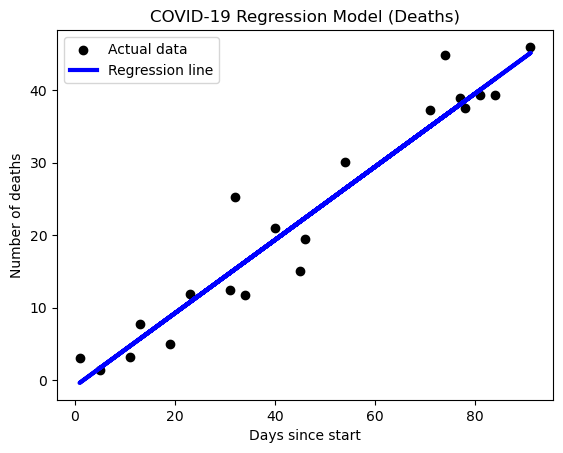

In [45]:
# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, predictions, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Days since start')
plt.ylabel('Number of deaths')
plt.title('COVID-19 Regression Model (Deaths)')
plt.legend()
plt.show()

**7. Documentation:**

Provide a report summarizing the findings, including insights from the exploratory analysis.


This report provides a foundation for understanding and predicting COVID-19-related deaths using a simple linear regression model. Additional research and refinement of the model may enhance predictive accuracy and uncover further insights into the factors influencing the outcomes.



-----------------------------------------------------------------------------------------------------

**Add the name of the group and its members here:**

In [47]:
# Group 1, Lähteenmäki Miro, Rabiul Islam